## Skill Activity:4
* Date: 24-07-2021
* Name: Pratibha S. Gupta.
* Email_id : gpratibha970@gmail.com
* Module Code: ML14
* Time taken to complete the activity?
   5 hours .

Read **Titanic data** given in the data set folder
1. Create the user defined function to handle null values.
2. Handle null values using sklearn imputer package
3. change categorical values to numeric using:  np.where(), label encoder, get dummies, one hot encoder and column transformation
4. check if data is clean and ready to implement algorithm
5. implement leave one out , k-fold, stratified k-fold, train test split
6. scale the data (Standard scaler, MinMax ...etc... )
7. Implement suitable machine learning algorithm.
8. compare different algorithm

**Variable Information**
- survival:	Survival	0 = No, 1 = Yes
- pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex:	Sex	
- Age:	Age in years	
- sibsp:	# of siblings / spouses aboard the Titanic	
- parch:	# of parents / children aboard the Titanic	
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Import Data and it's information**

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train=pd.read_csv('titanic_train.csv')    ##import data
data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
print(data_train.shape)     ##print the dimension of the data

(891, 12)


In [4]:
data_train.isnull().sum()  ##checking missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age' variable has 177 Missing information, 'Cabin' Variable has 687 missing information, 'Embarked' has 2 missing observation.

In [5]:
data_train.info()     ##data information (data type, without missing observation count,dimension of the data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The variables 'PassengerId', 'Survived', 'Pclass', 'Sibsp', 'Parch' has integer datatype. 
- Variables 'Age' and 'Fare' has Float datatype. 
- Variables 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' has string datatype.

**Data Preprocessing**

In [6]:
# Deleting/droping unnecessary variables
col=['Name','PassengerId','Ticket']
data_train.drop(columns=col,axis=0, inplace=True)
data_train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,G6,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


From the above description we can say that:
- Variables 'Sex', 'Cabin', and  'Embarked' has 2,147 and 3 unique values respectively.
 
 
- In titanic data frequency of males are more than female i.e 577 males are there in titanic, frequency of cabin number B96 B98 (4) are more than others, and frequency of use of Southampton(644) Embarked is more than other types of Embarked.


- Mean age of Passenger in titanic was 29.69=~ in between 29-30 year and it may vary by (+-)14.52=~ (+-)14-15 year.Minimum age of passengers are 0.42(about 4 months kid) that means kids are there in titanic data and Maximum age of passengers are of 80 year.


- Mean fare of Passenger is 32.21 and it may vary by (+-) 49.69=~ (+-) 49-50. Minimum Fare of passengers are '0' and Maximum Fare of passengers are 512.3292=~ 512.


- Ticket class of passengers are on an average 2.31=~ 2 family memeber in a family and it may vary by (+-) 0.837=~ (+-)1. This indicates that Most of the passengers have taken tickets of Second class on an average.


- Maximum number of family members in a family is 6.

In [7]:
#Checking unique observations in categorical data.
print(data_train['Pclass'].unique())
print(data_train['Cabin'].unique())
print(data_train['Embarked'].unique())

[3 1 2]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['S' 'C' 'Q' nan]


In [8]:
##Function to fill numerical missing observation i.e 'Age'
def age_approx(cols):
    Age =cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
data_train['Age'] = data_train[['Age', 'Pclass']].apply(age_approx, axis=1)  ## implementing function to the data

In [10]:
## Function to fill categorical missing observations.
def missing_cat_fill(dataframe):
    na_cols = [col for col in data_train.columns if data_train[col].isnull().sum() > 0 and data_train[col].dtype == "O"]
    for col in na_cols:
        dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])
        return dataframe.head()

In [11]:
# Implementing function to the data.
print(missing_cat_fill(data_train))  
print(missing_cat_fill(data_train))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked
0         0       3    male  22.0      1      0   7.2500  B96 B98        S
1         1       1  female  38.0      1      0  71.2833      C85        C
2         1       3  female  26.0      0      0   7.9250  B96 B98        S
3         1       1  female  35.0      1      0  53.1000     C123        S
4         0       3    male  35.0      0      0   8.0500  B96 B98        S
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked
0         0       3    male  22.0      1      0   7.2500  B96 B98        S
1         1       1  female  38.0      1      0  71.2833      C85        C
2         1       3  female  26.0      0      0   7.9250  B96 B98        S
3         1       1  female  35.0      1      0  53.1000     C123        S
4         0       3    male  35.0      0      0   8.0500  B96 B98        S


In [12]:
#Checking missing observation
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

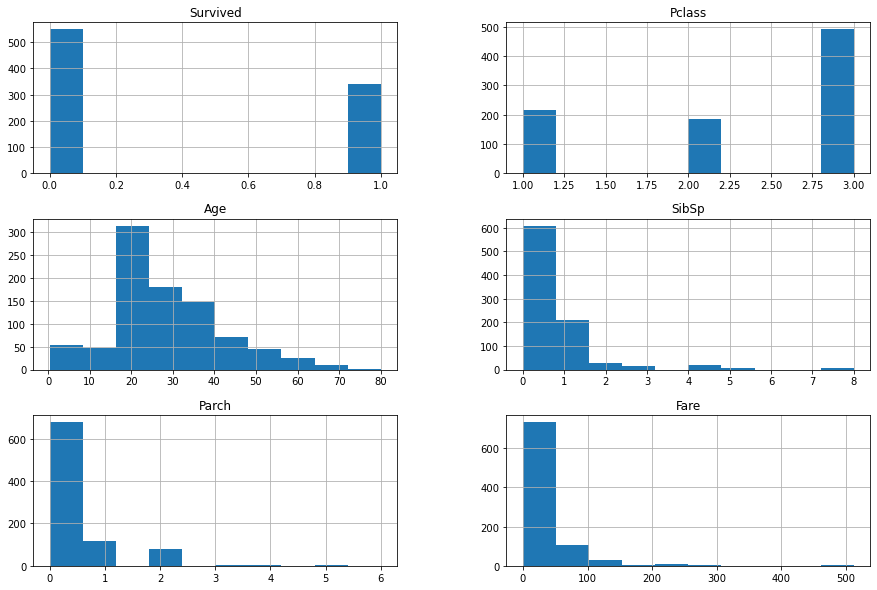

In [13]:
## Histogram of the data
data_train.hist(figsize=(15,10))
plt.show()

- From the above histogram graph we can say that data is not normal as this graph doesn't follow the property of symmetricity or normal curve.
- Variables 'Survived' and 'Pclass' is categorical data.

<AxesSubplot:>

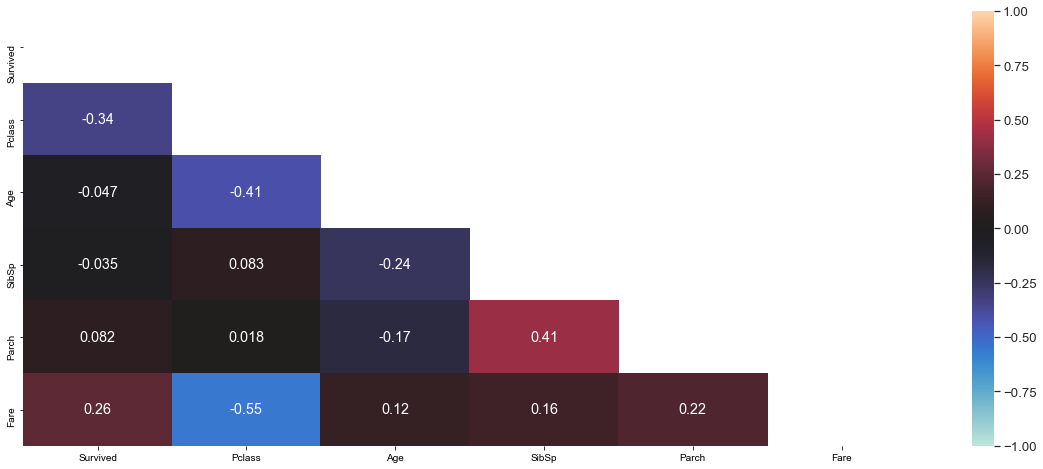

In [14]:
# Correlation plot of the data.
plt.subplots(figsize=(20,8))
sns.set(font_scale=1.2)
mask = np.triu(data_train.corr())
sns.heatmap(data_train.corr(),annot=True,vmin=-1, vmax=1, center= 0,mask=mask)

From the above correlation plot we can say that 'correlation between variable survived(dependent variable) and variables 'Fare', 'parch', 'age', 'Pclass' (Independent Variables) are very less'.

In [15]:
#Encoding categorical variable to numerical variable
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
data_train['Sex']= label_encoder.fit_transform(data_train['Sex'])
data_train['Cabin']= label_encoder.fit_transform(data_train['Cabin'])
data_train['Embarked']= label_encoder.fit_transform(data_train['Embarked'])

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [17]:
# Normality test of the data by using shapiro test
from scipy.stats import shapiro

print("Shapiro Normality Test")
print("\n")
print("Null Hypothesis : Sample data of the variable is from from Normal distribution")
print("Alternative Hypothesis : Sample data of the variable is not from from Normal distribution")
print("\n")

#perform Shapiro-Wilk test
statistic, p_value=shapiro(data_train.iloc[:,0:6])

print(data_train ," Shapiro statistic : %.6f, p value : %.6f" % (statistic, p_value))
alpha = 0.05
if p_value > alpha:
    print(data_train,"variable data" ,"is from Normal Distribution (fail to reject H0)")
else:
    print(data_train,"variable data","is not from Normal Distribution (reject H0)")

Shapiro Normality Test


Null Hypothesis : Sample data of the variable is from from Normal distribution
Alternative Hypothesis : Sample data of the variable is not from from Normal distribution


     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0           0       3    1  22.0      1      0   7.2500     47         2
1           1       1    0  38.0      1      0  71.2833     81         0
2           1       3    0  26.0      0      0   7.9250     47         2
3           1       1    0  35.0      1      0  53.1000     55         2
4           0       3    1  35.0      0      0   8.0500     47         2
..        ...     ...  ...   ...    ...    ...      ...    ...       ...
886         0       2    1  27.0      0      0  13.0000     47         2
887         1       1    0  19.0      0      0  30.0000     30         2
888         0       3    0  24.0      1      2  23.4500     47         2
889         1       1    1  26.0      0      0  30.0000     60         0
8

In [18]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit1 = test.fit(data_train.iloc[:,1:], data_train.iloc[:,0])
# summarize scores
set_printoptions(precision=3)
print(fit1.scores_)
features = fit1.transform(data_train.iloc[:,1:])
# summarize selected features
features
print(features[0:5,:])

[115.031 372.406   1.99    1.111   5.963  63.031  28.315  25.717]
[[ 3.     1.     7.25  47.   ]
 [ 1.     0.    71.283 81.   ]
 [ 3.     0.     7.925 47.   ]
 [ 1.     0.    53.1   55.   ]
 [ 3.     1.     8.05  47.   ]]


- The scores of 4 attributes chosen those with the highest scores. Specifically features with indexes 1(Pclass),2(Sex),5(Parch),6(Fare),7(Cabin),8(Embarked)

In [19]:
# Droping variables as per low feature values
#col=['Age','Sex']
#data_train.drop(columns=col,axis=0,inplace=True)

- Removing feature 'Age' and 'Sex' decreased the Accuracy of training model, so we have selected all the features to train the model effectively.


**MinMax Scaler**

In [20]:
# Normalizing the data using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data_train))
print(scaler.transform(data_train))

MinMaxScaler()
[[0.    1.    1.    ... 0.014 0.322 1.   ]
 [1.    0.    0.    ... 0.139 0.555 0.   ]
 [1.    1.    0.    ... 0.015 0.322 1.   ]
 ...
 [0.    1.    0.    ... 0.046 0.322 1.   ]
 [1.    0.    1.    ... 0.059 0.411 0.   ]
 [0.    1.    1.    ... 0.015 0.322 0.5  ]]


### Analysis

In [21]:
#importing necessary libraries for analysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [22]:
# deciding X and Y features for models
X=data_train.iloc[:,1:7]
Y=data_train.iloc[:,0]

In [23]:
#Splitting the data into 70-30 and defining k-fold
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
cv = KFold(n_splits=15, random_state=10, shuffle=True)

**1. Logistics Regression**

In [24]:
# Building Logistic regression model.
lm=LogisticRegression().fit(X_train,y_train.values)

In [25]:
#Prediction of logistic regression model
y_pred=lm.predict(X_test)

In [26]:
## Print intercept and  coefficients of independent variables.
print(lm.intercept_,lm.coef_)

[4.62] [[-1.077e+00 -2.646e+00 -3.534e-02 -3.155e-01  2.969e-02  2.510e-03]]


**Logistic Regression Model is:** \
Y= a+b1*x1+b2*x2+b3*x3+b4*x4+b5*x5+b6*x6 \
Y= 0.436-0.655*x1-0.131*x2+0.386*x3+0.004*x4+0.012*x5-0.199*x6 \
Where, x1=Pclass , x2= Sex,X3=Age, x4=SibSp, x5=Parch, x6=Fare, x7=Cabin , x8=Embarked, and  y=survived.

In [27]:
# Print Accuracy score of logistic regression model
print("Training set score:{:.3f}".format(lm.score(X_train,y_train)))
print("Test set score:{:.3f}".format(lm.score(X_test,y_test)))

Training set score:0.804
Test set score:0.784


In [28]:
## True Positive rate, False positive rate and AUC of logistic model
log_fpr,log_tpr,threshold=roc_curve(y_test,y_pred)
auc_log=auc(log_fpr,log_tpr)
## Cross validation score of logistic regression model.
SVCCV = (cross_val_score(lm, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

0.8026325977545491


- Accuracy score in training dataset is 80.4% and in testing dataset is 78.40%. CrossValidation Score is 80.26%.


**2. KNN Classifier**

In [29]:
# Building KNN Classifier model
KNN = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

In [30]:
# Prediction of KNN model
y_predknn = KNN.predict(X_test)

In [31]:
# Print accuracy score of KNN model
print("Training set score:{:.3f}".format(KNN.score(X_train,y_train)))
print("Test set score:{:.3f}".format(KNN.score(X_test,y_test)))

Training set score:0.778
Test set score:0.642


In [32]:
## True Positive rate, False positive rate and AUC of KNN model
knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_predknn)
auc_knn=auc(knn_fpr,knn_tpr)
## Cross validation score of KNN model.
SVCCV = (cross_val_score(KNN, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

0.6917537746806038


- Accuracy score in training dataset is 77.8% and in testing dataset is 64.20%. CrossValidation Score is 69.175%.



**3. Support Vector Classifier (RBF Kernel)** 

In [33]:
# BUilding SVC(rbf) kernel model
from sklearn import svm
Svc_classifier = svm.SVC(kernel = 'rbf', gamma='auto').fit(X_train, y_train)

In [34]:
# Predicting SVC model
y_predsvc = Svc_classifier.predict(X_test)

In [35]:
#Printing accuracy score of svc classifier model
print("Training set score:{:.3f}".format(Svc_classifier.score(X_train,y_train)))
print("Test set score:{:.3f}".format(Svc_classifier.score(X_test,y_test)))

Training set score:0.918
Test set score:0.679


In [36]:
## True Positive rate, False positive rate and AUC of SVC classifier model
svc_fpr,svc_tpr,threshold=roc_curve(y_test,y_predsvc)
auc_svc=auc(svc_fpr,svc_tpr)
## Cross validation score of SVC Classifier model.
SVCCV = (cross_val_score(Svc_classifier, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

0.7093302361595044


- Accuracy score in training dataset is 91.8% and in testing dataset is 67.90%. CrossValidation Score is 70.933%.


**4. Random Forest Classifier**

In [37]:
#Building Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=500,random_state=120).fit(X_train,y_train)
#Predicting Random forest model 
y_predrfc = rfc.predict(X_test)

In [38]:
#Printing accuracy score of Random Forest classifier model
print("Training set score:{:.3f}".format(rfc.score(X_train,y_train)))
print("Test set score:{:.3f}".format(rfc.score(X_test,y_test)))

Training set score:0.984
Test set score:0.799


In [39]:
## True Positive rate, False positive rate and AUC of Random Forest classifier model
rfc_fpr,rfc_tpr,threshold=roc_curve(y_test,y_predrfc)
auc_rfc=auc(rfc_fpr,rfc_tpr)
## Cross validation score of Random Forest Classifier model.
SVCCV = (cross_val_score(rfc, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

0.8344560588463029


- Accuracy score in training dataset is 98.4% and in testing dataset is 79.90%. CrossValidation Score is 83.45%.


**5. Decision Tree Classifier**

In [40]:
# Building Decision Tree Classifier
dec = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
# Predicting decision tree classifer model
y_preddec = dec.predict(X_test)

In [41]:
# Printing Accuracy score of Decision tree classifier model
print("Training set score:{:.3f}".format(dec.score(X_train,y_train)))
print("Test set score:{:.3f}".format(dec.score(X_test,y_test)))

Training set score:0.984
Test set score:0.769


In [42]:
## True Positive rate, False positive rate and AUC of Decision Tree classifier model
dec_fpr,dec_tpr,threshold=roc_curve(y_test,y_preddec)
auc_dec=auc(dec_fpr,dec_tpr)
## Cross validation score of Decision Tree Classifier model
SVCCV = (cross_val_score(dec, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

0.8087108013937283


- Accuracy score in training dataset is 98.4% and in testing dataset is 76.90%. CrossValidation Score is 80.87%.


**XG-Boost**

In [43]:
from xgboost import XGBClassifier
model_xg= XGBClassifier(n_estimators=20,random_state=42).fit(X_train, y_train)
y_predxgb= model_xg.predict(X_test)

[09:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
# Printing Accuracy score of Decision tree classifier model
print("Training set score:{:.3f}".format(model_xg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(model_xg.score(X_test,y_test)))

Training set score:0.923
Test set score:0.802


In [45]:
## True Positive rate, False positive rate and AUC of Decision Tree classifier model
xg_fpr,xg_tpr,threshold=roc_curve(y_test,y_predxgb)
auc_xgb=auc(xg_fpr,xg_tpr)
## Cross validation score of Decision Tree Classifier model
SVCCV = (cross_val_score(model_xg, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

[09:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

- Accuracy score in training dataset is 92.3% and in testing dataset is 80.20%. CrossValidation Score is 85.39%.


**Light-GBM Classifier**

In [46]:
from lightgbm import LGBMClassifier
model_lgb = LGBMClassifier(learning_rate=0.1,n_estimators=100).fit(X_train, y_train)
y_predlgb= model_lgb.predict(X_test)

In [47]:
# Printing Accuracy score of Decision tree classifier model
print("Training set score:{:.3f}".format(model_lgb.score(X_train,y_train)))
print("Test set score:{:.3f}".format(model_lgb.score(X_test,y_test)))

Training set score:0.950
Test set score:0.813


In [48]:
## True Positive rate, False positive rate and AUC of Decision Tree classifier model
lg_fpr,lg_tpr,threshold=roc_curve(y_test,y_predlgb)
auc_lgb=auc(lg_fpr,lg_tpr)
## Cross validation score of Decision Tree Classifier model
SVCCV = (cross_val_score(model_lgb, X_train, y_train, cv=cv, n_jobs=1, scoring = 'accuracy').mean())
print(SVCCV)

0.8379790940766552


- Accuracy score in training dataset is 95% and in testing dataset is 81.3%. CrossValidation Score is 83.80%.

\
\
\



**Confusion Matrix And Classification Report** 
- Accuracy of test data= [TP+FN]/[TP+FP+FN+TN]
- Precision= [TP]/[TP+FP]
- Recall/ Sensitivity = [TP]/[TP+FN]
- Specificity = [TN]/[TN+FP]     
- F1- score= 2*[(Precision * Recall)/(Precision+Recall)]     

 where, TP: When Both actual class and predicted class of observation of data is 1. \
FP: When actual class is 0 and predicted class of observation of data is 1. \
TN: When Both actual class and predicted class of observation of data is 0. \
FN: When actual class is 1 and predicted class of observation of data is 0. \


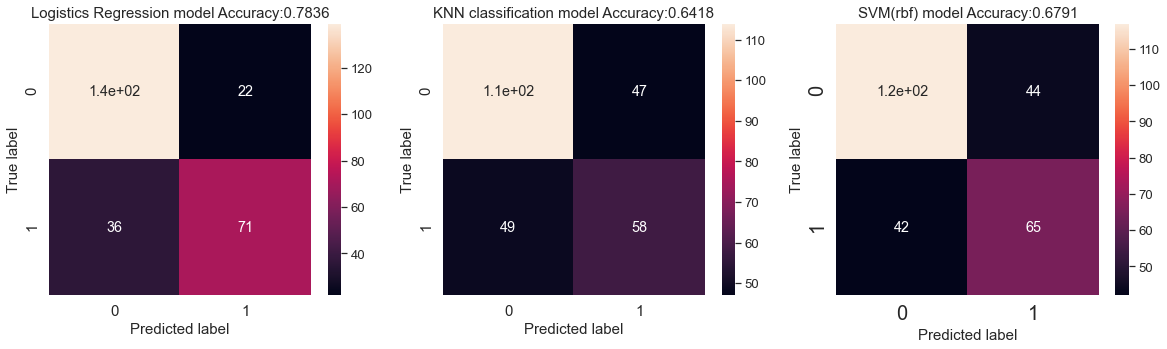

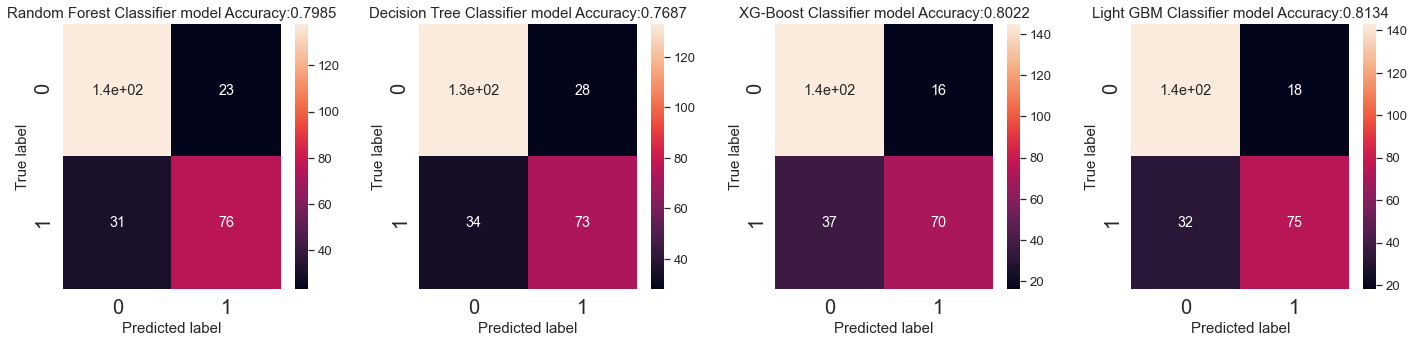

In [49]:
# Confusion Matrix of all classifier models
fig, (ax1, ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, ax=ax1)
ax1.set_xlabel('Predicted label', fontsize=15)
ax1.set_ylabel('True label', fontsize=15)
ax1.set_title('Logistics Regression model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)), fontsize=15)
ax1.tick_params(labelsize=15)


cm = confusion_matrix(y_test, y_predknn) 
sns.heatmap(cm, annot=True, ax=ax2)
ax2.set_xlabel('Predicted label', fontsize=15)
ax2.set_ylabel('True label', fontsize=15)
ax2.set_title('KNN classification model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_predknn)), fontsize=15)
ax2.tick_params(labelsize=15)

cm = confusion_matrix(y_test, y_predsvc) 
sns.heatmap(cm, annot=True, ax=ax3)
ax3.set_xlabel('Predicted label', fontsize=15)
ax3.set_ylabel('True label', fontsize=15)
ax3.set_title('SVM(rbf) model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_predsvc)), fontsize=15)
ax3.tick_params(labelsize=20)

fig, (ax4, ax5, ax6,ax7) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

cm = confusion_matrix(y_test, y_predrfc) 
sns.heatmap(cm, annot=True, ax=ax4)
ax4.set_xlabel('Predicted label', fontsize=15)
ax4.set_ylabel('True label', fontsize=15)
ax4.set_title('Random Forest Classifier model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_predrfc)), fontsize=15)
ax4.tick_params(labelsize=20)

cm = confusion_matrix(y_test, y_preddec) 
sns.heatmap(cm, annot=True, ax=ax5)
ax5.set_xlabel('Predicted label', fontsize=15)
ax5.set_ylabel('True label', fontsize=15)
ax5.set_title('Decision Tree Classifier model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_preddec)), fontsize=15)
ax5.tick_params(labelsize=20)


cm = confusion_matrix(y_test, y_predxgb) 
sns.heatmap(cm, annot=True, ax=ax6)
ax6.set_xlabel('Predicted label', fontsize=15)
ax6.set_ylabel('True label', fontsize=15)
ax6.set_title('XG-Boost Classifier model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_predxgb)), fontsize=15)
ax6.tick_params(labelsize=20)

cm = confusion_matrix(y_test, y_predlgb) 
sns.heatmap(cm, annot=True, ax=ax7)
ax7.set_xlabel('Predicted label', fontsize=15)
ax7.set_ylabel('True label', fontsize=15)
ax7.set_title('Light GBM Classifier model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_predlgb)), fontsize=15)
ax7.tick_params(labelsize=20)

plt.subplots_adjust(wspace=1)
plt.tight_layout()

1. Logistic Regression Confusion Matrix: In confusion matrix of logistic regression, TP,FP,TN, and FN values are 71,22,140, and 36.
2. KNN Classification Confusion Matrix: In confusion matrix of KNN Classification, TP,FP,TN, and FN values are 58,47,110, and 49.
3. SVC(RBF) Confusion Matrix: In confusion matrix of SVC(RBF) , TP,FP,TN, and FN values are 65,44,120, and 42.
4. Random Forest Classification Confusion Matrix: In confusion matrix of Random Forest Classification, TP,FP,TN, and FN values are 76,23,140, and 31.
5. Decision Tree classifier Confusion Matrix: In confusion matrix of Decision Tree Classifier, TP,FP,TN, and FN values are 73,28,130, and 34.
6. XG-Boost Classifier Confusion Matrix: In confusion matrix of XG-Boost Classifier, TP,FP,TN, and FN values are 70,16,140, and 37.
7. Light-GBM Classifier Confusion Matrix: In confusion matrix of Light-GBM Classifier, TP,FP,TN, and FN values are 75,18,140, and 32.


In [50]:
## Printing Classification report of all classifer models
print('Report on Logistic Regression: \n',classification_report(y_test,y_pred))
print('Report on KNN: \n',classification_report(y_test,y_predknn))
print('Report on SVC(rbf): \n',classification_report(y_test,y_predsvc))
print('Report on Random Forest Classifier: \n',classification_report(y_test,y_predrfc))
print('Report on Decision Tree Classifier: \n',classification_report(y_test,y_preddec))
print('Report on XG-Boost Classifier: \n',classification_report(y_test,y_predxgb))
print('Report on Light-GBM Classifier: \n',classification_report(y_test,y_predlgb))

Report on Logistic Regression: 
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       161
           1       0.76      0.66      0.71       107

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

Report on KNN: 
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       161
           1       0.55      0.54      0.55       107

    accuracy                           0.64       268
   macro avg       0.63      0.63      0.63       268
weighted avg       0.64      0.64      0.64       268

Report on SVC(rbf): 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       161
           1       0.60      0.61      0.60       107

    accuracy                           0.68       268
   macro avg       0.67      0.67      0.67       268
we

- In report, '0': Not Survived, '1': Survived, Random Forest and LightGBm model gives precision=0.82 for not survived that indicates it is correctly classified 82% time. while precision for survived(1) is0.81 (81% correctly classified for survival) in LGBM and 0.77 (77% correctly classified for survival) in Random Forest.

- LGBM Model and Random Forest model has best precision and recall value as compare to other models, so these two models are best model for data.

**ROC-AUC Curve**
ROC:
[TPR: True Positive Rate]= [TP]/[TP+FN] \
[FPR: False Positive Rate]= [FP]/[FP+TN] \

AUC (Area Under Curve):
- It give average measure of performance of classification model across various threshold points.
- Higher AUC of model is the best model. 

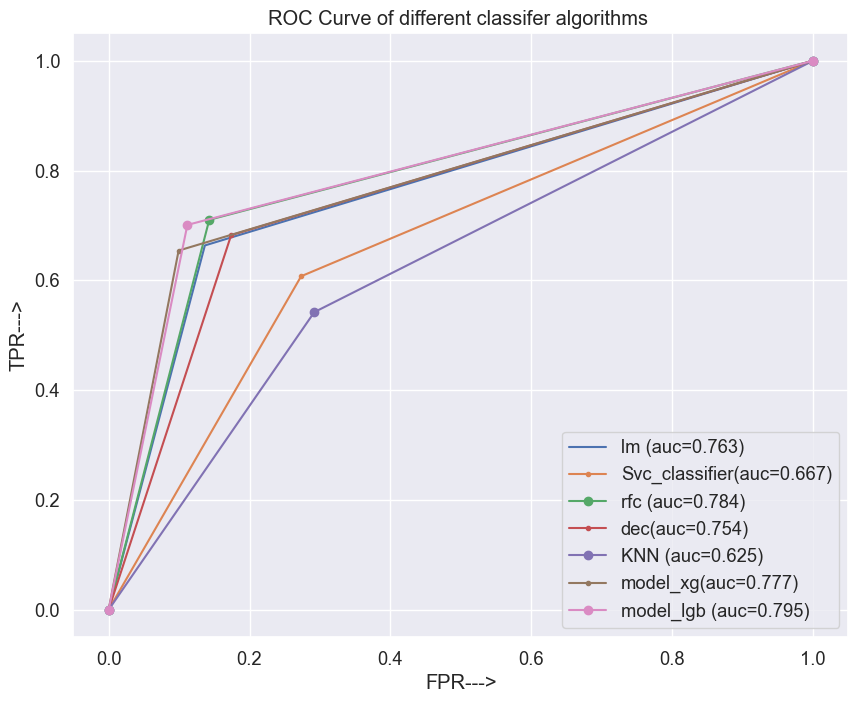

<Figure size 432x288 with 0 Axes>

In [51]:
# ROC-AUC Curve of all models.
plt.figure(figsize=(10,8),dpi=100)
plt.plot(log_fpr,log_tpr,linestyle="-",label='lm (auc=%0.3f)' %auc_log)
plt.plot(svc_fpr,svc_tpr,marker='.',label='Svc_classifier(auc=%0.3f)' %auc_svc)
plt.plot(rfc_fpr,rfc_tpr,marker='o',label='rfc (auc=%0.3f)' %auc_rfc)
plt.plot(dec_fpr,dec_tpr,marker='.',label='dec(auc=%0.3f)' %auc_dec)
plt.plot(knn_fpr,knn_tpr,marker='o',label='KNN (auc=%0.3f)' %auc_knn)
plt.plot(xg_fpr,xg_tpr,marker='.',label='model_xg(auc=%0.3f)' %auc_xgb)
plt.plot(lg_fpr,lg_tpr,marker='o',label='model_lgb (auc=%0.3f)' %auc_lgb)
plt.xlabel('FPR--->')
plt.ylabel('TPR--->')
plt.title("ROC Curve of different classifer algorithms ")
plt.legend()
plt.show()
plt.savefig('ROC Curve(different algorithms).png')

1. Logistics Regression
    - Model Accuracy: 80.4%
    - Model Accuracy on test data: 78.40%
    - CrossValidation Score: 80.26%
    - AUC=76.3% 
2. KNN Classifier
    - Model Accuracy: 77.8%
    - Model Accuracy on test data: 64.20%
    - Cross Validation Score:69.175%
    - AUC:62.5%
3. SVC (rbf)
    - Model Accuracy: 91.8%
    - Model Accuracy on test data: 67.9%
    - CrossValidation Score: 70.93%
    - AUC: 66.70%
4. Random Forest Classifier
    - Model Accuracy: 98.4%
    - Model Accuracy on test data: 79.90%
    - Cross Validation Score: 83.45%
    - AUC: 78.40%
5. Decision Tree Classifier
    - Model Accuracy: 98.4%
    - Model Accuracy on test data: 76.90%
    - Cross Validation Score: 80.87%
    - AUC: 75.40%
    
4. XG_Boost Classifier
    - Model Accuracy: 92.3%
    - Model Accuracy on test data: 80.20%
    - Cross Validation Score: 85.39%
    - AUC: 77.70%
5. Light-GBM Classifier
    - Model Accuracy: 95%
    - Model Accuracy on test data: 81.30%
    - Cross Validation Score: 83.80%
    - AUC: 79.50%
    
- Random Forest Classifier  and Light-gbm gives higher AUC, that indicates Random Forest and Light-GBM is best model as compare to other models.
- Best accuracy of model on test data is Light-GBM model with highest cross validation and AUC.

- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=T%20P%20R%20%3D%20T%20P%20T%20P,plots%20TPR%20vs.%20FPR%20at%20different%20classification%20thresholds.